In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Associative Networks 

In this lab, we will implement the associative network introduced in class. As discussed in lecture, we consider a network architecture where a set of input nodes projects directly to a set of output nodes, without any hidden layers:

(the following) This schematic network consists of 4 input nodes and 4 output nodes, where each node can take on different values (represented by different shades of red in our visualization).
Mathematically, we can think of the input here as a vector $\vec{x} \in \mathbb{R}^4$ and the output as a vector $\vec{y} \in \mathbb{R}^4$. Each component of these vectors represents the activation value of the corresponding node.

The key question we're thinking about is: how can we transform an input vector $\vec{x}$ into the desired output vector $\overrightarrow{\boldsymbol{y}}$ ? The transformation is accomplished through a weight matrix $\mathbf{A}$ that represents the strength of connections between input and output nodes. Each line in our diagram corresponds to a weight $a_{i j}$ in this matrix, representing how strongly input node $j$ influences output node $i$.

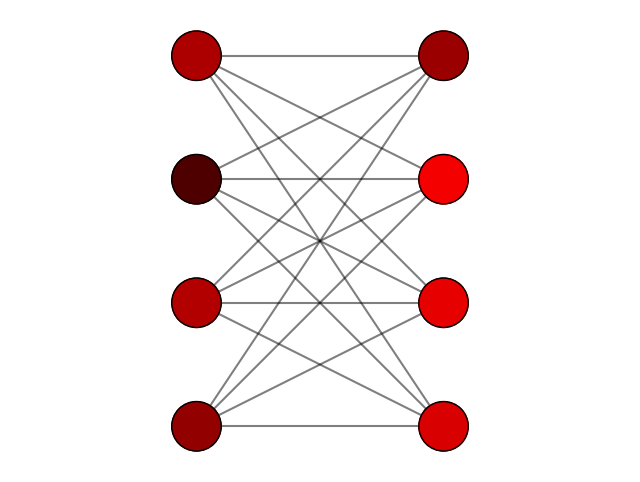

In [3]:
def draw_network():
    
    # create figure
    plt.figure(figsize=(8, 6))
    
    # parameters
    neuron_radius = 0.2
    layer_spacing = 2
    neuron_spacing = 1
    
    # generate random red values for each neuron (8 neurons total)
    red_values = np.random.uniform(0.3, 1.0, size=(2, 4))  # 2 layers, 4 neurons each
    
    # coordinates for input and output layers
    y_coords = np.array([0, 1, 2, 3]) * neuron_spacing
    
    # draw connections
    for y_in in y_coords:
        for y_out in y_coords:
            plt.plot([0, layer_spacing], [y_in, y_out], 'k-', alpha=0.5)
    
    # draw neurons
    for i, y in enumerate(y_coords):
        # input layer neurons
        red_color = (red_values[0,i], 0, 0)  # RGB tuple with only red channel
        circle_in = plt.Circle((0, y), radius=neuron_radius, fill=True, color=red_color, zorder=2)
        edge_in = plt.Circle((0, y), radius=neuron_radius, fill=False, color='black', zorder=3)
        plt.gca().add_patch(circle_in)
        plt.gca().add_patch(edge_in)
        
        # output layer neurons
        red_color = (red_values[1,i], 0, 0)  # different red value for output neurons
        circle_out = plt.Circle((layer_spacing, y), radius=neuron_radius, fill=True, color=red_color, zorder=2)
        edge_out = plt.Circle((layer_spacing, y), radius=neuron_radius, fill=False, color='black', zorder=3)
        plt.gca().add_patch(circle_out)
        plt.gca().add_patch(edge_out)
    
    # set equal aspect ratio and remove axes
    plt.axis('equal')
    plt.axis('off')

# draw network
draw_network()
plt.show()

#### A first association

In [10]:
# parameters
N = 5               # number of neurons in each layer
eta = 1             # learning rate

# generate input vector with elements uniformly distributed between 0 and 1
x = 2 * ( np.random.rand( N, 1 ) - 0.5 )
x = x / np.linalg.norm( x ) # ensure unit norm

# # generate output vector with elements uniformly distributed between 0 and 1
y = 2 * ( np.random.rand( N, 1 ) - 0.5 )
y = y / np.linalg.norm( y ) # ensure unit norm

# # construct Hebbian outer product matrix
A = eta * np.outer( y, x )

# compute output from this association
y_prime = A @ x

# output inner product of y and y'
print( y.T @ y_prime )

[[1.]]


Observe that the output shows that the dot product of y and y' is 1. This means that the reconstructed output vector y' is identical to the original output vector y. This makes sense in this case because the Hebbian matrix only "contains" a single association.

#### Note on Random Output Vector $\vec{y}$ in the Hebbian Association Example

In the lab example, we generate the output vector $\vec{y}$ randomly and normalise it. This is done solely for illustrative purposes-to demonstrate that when we construct the Hebbian weight matrix

$$
A=\eta \vec{y} \vec{x}^T,
$$

and then compute

$$
\vec{y}^{\prime}=A \vec{x}
$$

we perfectly recover the original $\vec{y}$ (i.e., $\vec{y}^{\prime}=\vec{y}$ ).
In a practical scenario, however, $\vec{y}$ would not be random. Instead, $\vec{y}$ would be computed using the learned weight matrix and an activation function, according to

$$
\vec{y}=f(A \vec{x})
$$


Thus, the random assignment of $\vec{y}$ in this example is a "jump ahead" to illustrate the basic mechanism of Hebbian learning without the complications of a full training process.

#### Geometry of random vectors in high dimensions

The following code computes the average cosine similarity between two random vectors in a high-dimensional space as a function of the dimension $N$.

Note how the cosine similarity drops off rapidly as the dimension increases. This means that any two random vectors in a high-dimensional space are almost orthogonal, and become more so as the dimension increases.

(Cosine similarity is a measure of the similarity between two vectors. It is defined as the dot product of the two vectors divided by the product of their magnitudes.)

/tmp/ipykernel_41606/1347608258.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d[ii] = ( np.matmul( np.transpose(x1), x2 ) )


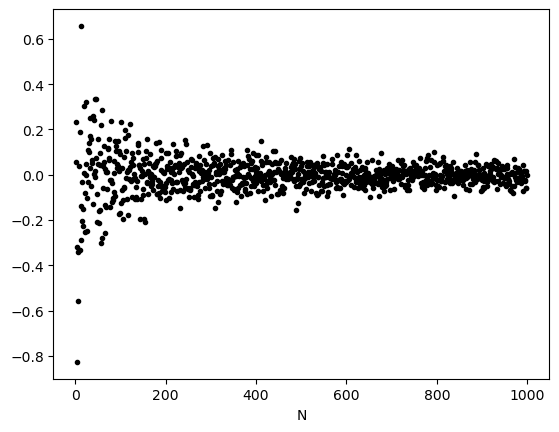

In [5]:
# parameters
N = np.arange( 2, int(1e3), step=1 ) # vector of dimensions to compute
d = np.zeros( len(N) )               # vector of average cosine similarities

for ii in np.arange(0,len(N)):
  # generate two random vectors (of dimension N[ii]) and normalize them
  x1 = 2 * ( np.random.rand( N[ii], 1 ) - 0.5 )
  x1 = x1 / np.linalg.norm( x1 )

  x2 = 2 * ( np.random.rand( N[ii], 1 ) - 0.5 )
  x2 = x2 / np.linalg.norm( x2 )

  # compute the cosine similarity between the two vectors
  d[ii] = ( np.matmul( np.transpose(x1), x2 ) )
  
plt.plot( N, d, 'k.' )
plt.xlabel( 'N' )
plt.show()

#### Storing multiple associations

0.9956215317826498


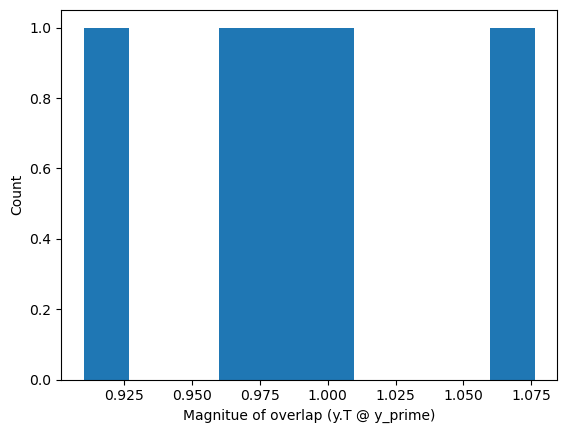

In [22]:
# parameters (N = number of neurons, M = number of associations, eta = learning rate)
N = 20; M = 5; eta = 1;

# generate input and output vectors with random elements in [0,1] and unit norm
x = np.zeros( (N,M) ); y = np.zeros( (N,M) )
for ii in np.arange(0,M):
  x[:,ii] = 2 * ( np.random.rand( N ) - 0.5 )
  x[:,ii] = x[:,ii] / np.linalg.norm( x[:,ii] )
  y[:,ii] = 2 * ( np.random.rand( N ) - 0.5 )
  y[:,ii] = y[:,ii] / np.linalg.norm( y[:,ii] )

# generate the aggregate Hebbian outer product matrix
# we know A will be a NxN matrix because the main computation is y*x^T and both y and x have N elements
A = np.zeros( (N,N) )
for ii in np.arange(0,M):
  A += eta * np.outer( y[:,ii], x[:,ii] )

# compute output y' for the first association (recalled output)
y_prime = A @ x[:,1]

# print the result
print( y[:,1].T @ y_prime )

# compute all y' and plot histogram
ell = np.zeros( M )
for ii in np.arange(0,M):
  y_prime = A @ x[:,ii]
  ell[ii] = np.abs( y[:,ii].T @ y_prime )
plt.hist( ell )

plt.xlabel('Magnitue of overlap (y.T @ y_prime)')
plt.ylabel('Count')

plt.show()